In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import src.utilerias.reader as rd
import src.utilerias.utilerias as utls

# Llamamos a la función antes de ejecutar el script
logs_dir = 'logs/NARNN/estandar'
logs_dir_auto_pred = 'logs/NARNN/auto_predictiva'
utls.eliminar_archivos_registro(logs_dir)
utls.eliminar_archivos_registro(logs_dir_auto_pred)

In [2]:
# DATOS = 'cierre.csv'#Grupo Financiero Inbursa
# DATOS = 'Datos históricos COMI 03012016_27122020.csv' #Datos originales
# DATOS = 'datos/Datos históricos COMI 3ene16-31dic2020 semanal.csv' #Datos semanales
# DATOS = 'Datos históricos COMI_prueba 30jun19-31dic2020.csv' #Datos semanales de prueba
# DATOS = 'Datos históricos COMI3ene2016_27dic2020_diario.csv' #Datos originales diarios de prueba
# DATOS = 'Datos históricos COMI_prueba 30jun19-31dic2020_DIARIO.csv' #Datos diarios de prueba

# ACTINVRB
DATOS = 'datos\_nacionales\entidades financieras\ACTINVRB\_030116_ 311223.csv' 
# BOLSAA
#DATOS = 'datos\_nacionales\entidades financieras\BOLSAA\_030116_311223.csv'
# GBMO
#DATOS = 'datos\_nacionales\entidades financieras\GBMO\_030116_311223.csv'
# GENTERA
#DATOS = 'datos\_nacionales\entidades financieras\GENTERA\_030116_311223.csv'
# GFINBURO
#DATOS = 'datos\_nacionales\entidades financieras\GFINBURO\_030116_311223.csv'
# GFNORTEO
#DATOS = 'datos\_nacionales\entidades financieras\GFNORTEO\_030116_311223.csv'
# GNP
#DATOS = 'datos\_nacionales\entidades financieras\GNP\_030116_311223.csv'
# Q
#DATOS = 'datos\_nacionales\entidades financieras\Q\_030116_311223.csv'

cierre = rd.leer_archivo(DATOS).astype(float)

In [3]:
#Se crean los conjuntos de entradas y salidas para la red, que funcionaran para predecir y comparar con las salidas esperadas a la hora de realizar el entrenamiento
time_steps = 8 # la cantidad de semanas anteriores a partir de las cuales se va a predecir la novena semana

#Se comenta el primer y descomenta el segundo para muestreo aleatorio

#Obtenemos el conjunto de entrenamiento
c_entrenamiento = np.array(cierre[:int(len(cierre) * 0.7)])

precios_reales = cierre[int(len(cierre) * 0.7):] #verdaderos valores del conjunto de prueba

#Se concatenan los ultimo 8 elementos del conjunto de entrenamiento para predecir el primero del conjunto de prueba
# ahora cada uno de los arreglos dentro de components_p y components_p_n tiene forma (84,)
c_prueba = cierre[len(cierre) - len(precios_reales) - time_steps:]

# Genera índices aleatorios únicos y ordenados
# indices_aleatorios = np.sort(np.random.choice(len(cierre), size=int(0.3 * len(cierre)) + 8, replace=False))
# # Selecciona los elementos correspondientes a los índices ordenados
# c_prueba = cierre[indices_aleatorios]
# # Calcula los índices del 70% restante (complemento del conjunto del 30%)
# indices_restantes = np.setdiff1d(np.arange(len(cierre)), indices_aleatorios)
# # Selecciona los elementos correspondientes a los índices restantes
# c_entrenamiento = cierre[indices_restantes]



#Se normalizan cada uno de los elementos de los vectores contenidos en las descomposicion de la serie de tiempo original
c_entrenamiento_n = utls.normalizar(c_entrenamiento) # componentes de entrenamiento normalizados
c_prueba_n = utls.normalizar(c_prueba) # componentes de prueba normalizados len 78

In [4]:
from src.modelos.auto_regresivo.NARNN.NARNN import NARNN
from src.modelos.auto_regresivo.entrenamientos.entrenamiento import Entrenamiento as entr

red = NARNN(t_entrada=8, t_salida=1, nombre="NARNN")
red.load_state_dict(torch.load('redes/NARNN/estandar/ACTINVRB/red_NARNN_lr0-04_e30.pth'))
red.eval()

entrenamiento_8_1 = [[]]
prueba_8_1 = [[]]

# A cada uno de los conjuntos de entrenamiento se les da una forma de entrada en especifico,
# que es un arreglo de 8 y uno de un solo elemento para representar la salida

entrenamiento_8_1[0] = utls.corrimiento_t_1(c_entrenamiento_n,9) # list(tensor[()]*) una lista de 174 tensores con 9 elementos cada uno
prueba_8_1[0] = utls.corrimiento_t_1(c_prueba_n,9) # list(tensor[()]*) una lista de 78 tensores con 9 elementos cada uno

C:\Users\Miguel\AppData\Local\Temp\ipykernel_2772\3896758514.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  red.load_state_dict(torch.load('redes/NARNN/estandar/ACTINVR

In [5]:
# Definimos el número de epocas
EPOCAS = 60
LR = 0.04

In [6]:
# Se realiza el entrenamiento de cada una de las redes y se guarda el modelo ya entrenado

# entr_red = entr(red,0,writer_dir=logs_dir)
# entr_red.entrena_lm(entrenamiento_8_1[0],epocas=EPOCAS,lr=LR,λ=0.1,e_predictivo=False)
#torch.save(red.state_dict(), 'redes/NARNN/estandar/red_NARNN.pth') #Salvamos el estado actual del modelo

# Cerrar el escritor
# entr_red.cerrar_escritor()

# Predicción del conjunto de prueba

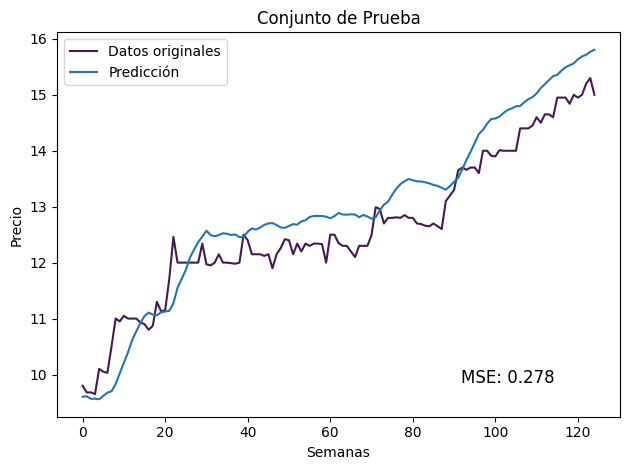

In [7]:
#Se grafica el conjunto de entrenamiento
criterion = nn.MSELoss()

prediccion = utls.genera_prediccion_1(prueba_8_1[0],red,8)
precios_predichos = utls.desnormalizar(prediccion,np.max(c_prueba),np.min(c_prueba)).detach().numpy()
# le quitamos los primeros 8 elementos
precios_predichos = precios_predichos[time_steps:]
plt.plot(c_prueba[time_steps:], color = '#451952', label = 'Datos originales') 
plt.plot(precios_predichos, label = 'Predicción')
plt.title('Conjunto de Prueba')
plt.xlabel('Semanas')
plt.ylabel('Precio')
plt.text(0.8, 0.1, f"MSE: {round(float(criterion(torch.tensor(precios_predichos), torch.tensor(c_prueba[time_steps:]))),4)}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.legend()

plt.tight_layout()
plt.show()

# Evaluación de desempeño

In [8]:
import pandas as pd
r_c_prueba_txt = 'Precicción de c_prueba'
# Supongamos que tenemos una lista de errores de predicción para cada red neuronal
rmse = {
    r_c_prueba_txt: utls.rmse(c_prueba[time_steps:],precios_predichos)
}
mape = {
    r_c_prueba_txt: utls.mape(c_prueba[time_steps:],precios_predichos)
}
ds = {
    r_c_prueba_txt: utls.directional_symmetry(c_prueba[time_steps:],precios_predichos)
}

# Creamos un DataFrame de Pandas a partir del diccionario de errores
df_errores = pd.DataFrame({
    'RMSE': pd.Series(rmse),
    'MAPE': pd.Series(mape),
    'DS': pd.Series(ds)
})

# Mostramos el DataFrame con los errores
print(df_errores) 


                          RMSE      MAPE    DS
Precicción de c_prueba  0.5272  3.728504  57.6


# Generamos el entrenamiento predictivo

In [9]:
# Definimos el número de epocas
EPOCAS = 60
LR = 0.05
DF= 0.5
BS = 8

In [10]:
#model_path = f'redes/NARNN/auto_predictiva/{"ACTINVRB/red_NARNN_lr0-018_e30.pth"}'
red.load_state_dict(torch.load('redes/NARNN/auto_predictiva/ACTINVRB/red_NARNN_lr0.06_e30_bs8_df0.5.pth'))
#red.load_state_dict(torch.load(model_path))
red.eval()

# str_conj_datos = 'ACTINVRB'

# entr_red_pred = entr(red,0, logs_dir_auto_pred)
# entr_red_pred.entrena_lm(entrenamiento_8_1[0],EPOCAS,lr=LR,λ=0.1,batch_size=8,decay_factor=DF,e_predictivo=True)
# torch.save(red.state_dict(), f'redes/NARNN/auto_predictiva/{str_conj_datos}/red_NARNN_lr{LR}_e{EPOCAS}_bs{BS}_df{DF}.pth') #Salvamos el estado actual del modelo

# # Cerrar el escritor
# entr_red_pred.cerrar_escritor()

C:\Users\Miguel\AppData\Local\Temp\ipykernel_2772\2534711188.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  red.load_state_dict(torch.load('redes/NARNN/auto_predictiva/

NARNN(
  (fc1): Linear(in_features=8, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)

In [11]:
# Predice el conjunto de entrenamiento usando la prediccion predictiva a partir de los primeros (usando los datos que predice)
# prediccion_ap = utls.genera_prediccion_predictiva(prueba_8_1[0][0][:8],8,len(prueba_8_1[0]),red)
prediccion_ap = utls.genera_pred_auto_predictiva(c_prueba_n,time_steps,red)
prediccion_ap = torch.Tensor(prediccion_ap)
red_ap_precios_predichos = utls.desnormalizar(prediccion_ap,np.max(c_prueba),np.min(c_prueba)).detach().numpy()
# omitimos los primeros 8 elementos
red_ap_precios_predichos = red_ap_precios_predichos[time_steps:]

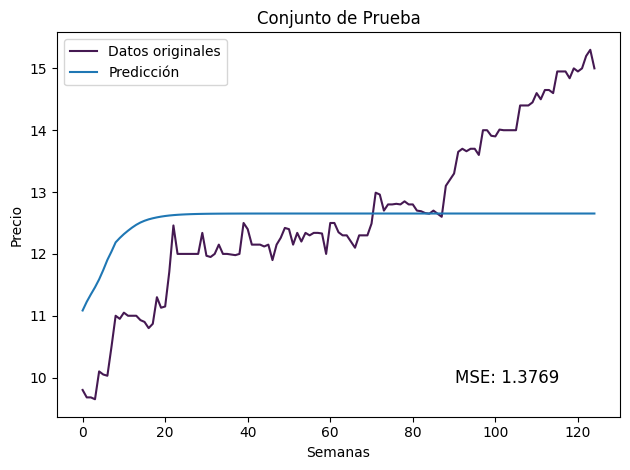

In [12]:

plt.plot(c_prueba[time_steps:], color = '#451952', label = 'Datos originales')
plt.plot(red_ap_precios_predichos, label = 'Predicción')#label=f"Datos de Analisis: {DATOS}",
plt.title('Conjunto de Prueba')
plt.xlabel('Semanas')
plt.ylabel('Precio')
plt.text(0.8, 0.1, f"MSE: {round(float(criterion(torch.tensor(red_ap_precios_predichos), torch.tensor(c_prueba[time_steps:]))),4)}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
r_c_prueba_txt = 'Precicción de c_prueba'
# Supongamos que tenemos una lista de errores de predicción para cada red neuronal
rmse = {
    r_c_prueba_txt: utls.rmse(c_prueba[time_steps:],red_ap_precios_predichos)
}
mape = {
    r_c_prueba_txt: utls.mape(c_prueba[time_steps:],red_ap_precios_predichos)
}
ds = {
    r_c_prueba_txt: utls.directional_symmetry(c_prueba[time_steps:],red_ap_precios_predichos)
}

# Creamos un DataFrame de Pandas a partir del diccionario de errores
df_errores = pd.DataFrame({
    'RMSE': pd.Series(rmse),
    'MAPE': pd.Series(mape),
    'DS': pd.Series(ds)
})

# Mostramos el DataFrame con los errores
print(df_errores) 

                          RMSE      MAPE    DS
Precicción de c_prueba  1.1734  7.394705  76.8


Acotamos el conjunto de predicciones a solo las n primeras semanas, a fin de ser más justos en el analisis.

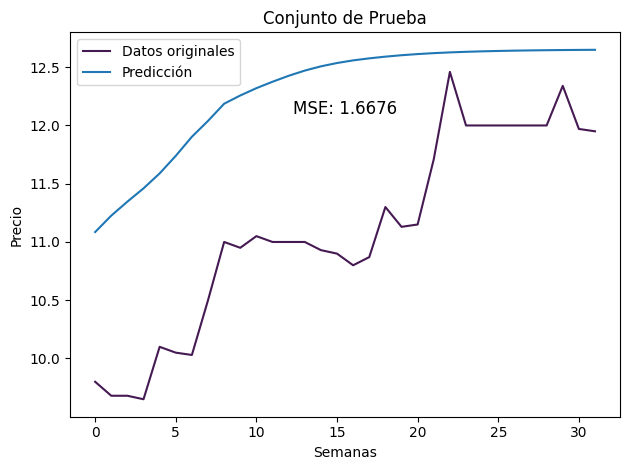

                          RMSE      MAPE     DS
Precicción de c_prueba  1.2914  11.16652  56.25


In [14]:
cota_semanas = 32

plt.plot(c_prueba[time_steps:time_steps + cota_semanas], color = '#451952', label = 'Datos originales')
plt.plot(red_ap_precios_predichos[:cota_semanas], label = 'Predicción')#label=f"Datos de Analisis: {DATOS}",
plt.title('Conjunto de Prueba')
plt.xlabel('Semanas')
plt.ylabel('Precio')
plt.text(0.5, 0.8, f"MSE: {round(float(criterion(torch.tensor(red_ap_precios_predichos[:cota_semanas]), torch.tensor(c_prueba[time_steps:time_steps + cota_semanas]))),4)}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()

plt.tight_layout()
plt.show()

rmse = {
    r_c_prueba_txt: utls.rmse(c_prueba[time_steps:time_steps + cota_semanas],red_ap_precios_predichos[:cota_semanas])
}
mape = {
    r_c_prueba_txt: utls.mape(c_prueba[time_steps:time_steps + cota_semanas],red_ap_precios_predichos[:cota_semanas])
}
ds = {
    r_c_prueba_txt: utls.directional_symmetry(c_prueba[time_steps:time_steps + cota_semanas],red_ap_precios_predichos[:cota_semanas])
}

# Creamos un DataFrame de Pandas a partir del diccionario de errores
df_errores = pd.DataFrame({
    'RMSE': pd.Series(rmse),
    'MAPE': pd.Series(mape),
    'DS': pd.Series(ds)
})

# Mostramos el DataFrame con los errores
print(df_errores) 

In [15]:
# Predice el conjunto de entrenamiento usando la prediccion predictiva a partir de los primeros (usando los datos que predice)
# con corrección cada 8 semanas
red_ap_precios_predichos = utls.genera_pred_auto_predictiva(c_prueba_n,time_steps,red, correccion=True)
# omitimos la desnormalización para que la comparación sea más justa.
#red_ap_precios_predichos = utls.desnormalizar(prediccion_ap,np.max(c_prueba),np.min(c_prueba)).detach().numpy()
# omitimos los primeros 8 elementos
red_ap_precios_predichos = red_ap_precios_predichos[time_steps:]

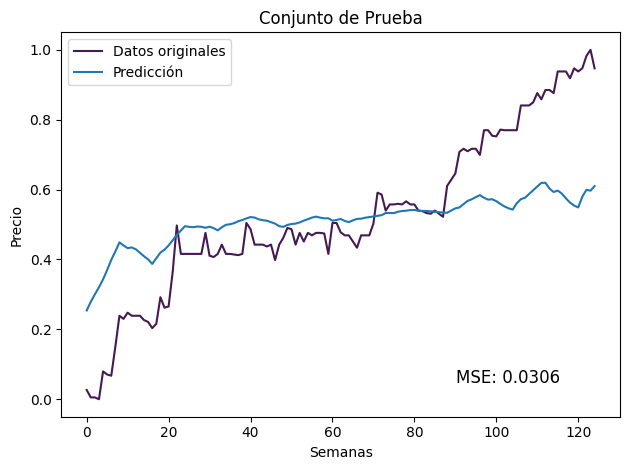

                          RMSE          MAPE    DS
Precicción de c_prueba  0.1749  1.154220e+15  65.6


In [17]:
plt.plot(c_prueba_n[time_steps:], color = '#451952', label = 'Datos originales')
plt.plot(red_ap_precios_predichos, label = 'Predicción')#label=f"Datos de Analisis: {DATOS}",
plt.title('Conjunto de Prueba')
plt.xlabel('Semanas')
plt.ylabel('Precio')
plt.text(0.8, 0.1, f"MSE: {round(float(criterion(torch.tensor(red_ap_precios_predichos), torch.tensor(c_prueba_n[time_steps:]))),4)}", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()

mse_e_values = utls.mse_elemental(c_prueba_n[time_steps:], red_ap_precios_predichos)

plt.tight_layout()
plt.show()

rmse = {
    r_c_prueba_txt: utls.rmse(c_prueba_n[time_steps:],red_ap_precios_predichos)
}
mape = {
    r_c_prueba_txt: utls.mape(c_prueba_n[time_steps:],red_ap_precios_predichos)
}
ds = {
    r_c_prueba_txt: utls.directional_symmetry(c_prueba_n[time_steps:],red_ap_precios_predichos)
}

# Creamos un DataFrame de Pandas a partir del diccionario de errores
df_errores = pd.DataFrame({
    'RMSE': pd.Series(rmse),
    'MAPE': pd.Series(mape),
    'DS': pd.Series(ds)
})

# Mostramos el DataFrame con los errores
print(df_errores) 

[0.008 0.088 0.128 0.144 0.168 0.184 0.192 0.2   0.208 0.224 0.232 0.24
 0.256 0.256 0.272 0.272 0.296 0.304 0.312 0.312 0.312 0.312 0.328 0.344
 0.344 0.344 0.352 0.36  0.376 0.376 0.376 0.384 0.384 0.392 0.4   0.4
 0.408 0.44  0.448 0.456 0.456 0.456 0.472 0.488 0.488 0.496 0.496 0.496
 0.504 0.504 0.512 0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.536 0.536
 0.536 0.536 0.544 0.544 0.552 0.552 0.552 0.56  0.56  0.56  0.56  0.56
 0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.568 0.568
 0.568 0.568 0.568 0.568 0.568 0.568 0.568 0.568 0.568 0.568 0.568 0.568
 0.568 0.568 0.568 0.568 0.568 0.576 0.576 0.576 0.576 0.576 0.576 0.576
 0.576 0.576 0.576 0.576 0.576 0.576 0.576 0.576 0.576 0.576 0.584 0.584
 0.584 0.584 0.584 0.584 0.584 0.592 0.592 0.592 0.592 0.6   0.6   0.6
 0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6
 0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.608
 0.616 0.616 0.616 0.616 0.616 0.616 0.616 0.616 0.616 0.61

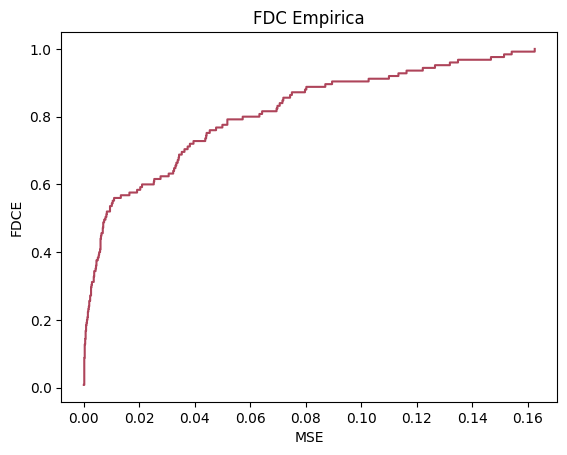

In [22]:
import statsmodels.api as sm

# Calcular la ECDF
ecdf = sm.distributions.ECDF(mse_e_values)

# Valores para la gráfica
edcf_x = np.linspace(min(mse_e_values), max(mse_e_values), num=1000)
edcf_y = ecdf(edcf_x)

# Graficar la FDCE
plt.step(edcf_x, edcf_y, where='post', color='#AE445A')
plt.xlabel('MSE')
plt.ylabel('FDCE')
plt.title('FDC Empirica')
plt.show()

In [24]:
np.save('distribuciones/ACTINVRB/NARNN.npy', edcf_y)